# Лабораторная работа №6. Многоскоростная обработка сигналов.

Лаборатория цифровой обработки сигналов, МФТИ.

В названии файла заменить `familyname` на свою фамилию. Для выполнения задания требуются два сигнала с цифрового осциллографа (см. задачи 1.2 и 2.1).

Максимальная оценка по данной лабораторной работе ограничивается после дня зачета.  Вклад задач в итоговую оценку при сдаче на занятиях:
* 1.1 - 1 балл,
* 1.2 - 2 балла,
* 1.3 - 1 балл,
* 2.1 - 2 балла, 
* 2.2 - 2 балла,
* 3.1 - 1 балл,
* 3.2 - 1 балл.




In [241]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))
def oscilloscope_file_read(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
    return fs, signal_lev 

def analyse(fs, signal_lev, window='boxcar', stem_signal=False):
    figsize=[8,4]
    plt.rcParams['font.size'] = '12'    
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    if stem_signal:
        plt.stem(np.arange(signal_lev.size)/fs*1e3, signal_lev, markerfmt='.')
    else:
        plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

In [242]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
#%matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.

| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $N$   |  16 |  16 |  16 |  16 |  16 |  30 |  30 |  30 |  30 |   30 |   20 |   20 |   20 |   20 |   20 |   32 |   32 |   32 |   32 |   32 |
| $A_1$ |   2 |   3 |   4 |   5 |   6 |   2 |   3 |   4 |   5 |    6 |    2 |    3 |    4 |    5 |    6 |    2 |    3 |    4 |    5 |    6 |
| $n_1$ |   3 |   4 |   5 |   6 |   7 |   3 |   4 |   5 |   6 |    7 |    3 |    4 |    5 |    6 |    7 |    3 |    4 |    5 |    6 |    7 |
| $A_2$ |   3 |   5 |   1 |   2 |   5 |   3 |   5 |   1 |   2 |    5 |    3 |    5 |    1 |    2 |    5 |    3 |    5 |    1 |    2 |    5 |
| $n_2$ |   7 |   5 |   7 |   4 |   2 |   7 |   5 |   7 |   4 |    2 |    7 |    5 |    7 |    4 |    2 |    7 |    5 |    7 |    4 |    2 |

Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов:
 $$ x[k] = A_1\cos{\left (2\pi\dfrac{n_1}{N} k \right )} + A_2 \cos{\left (2\pi\dfrac{n_2}{N} k \right )}.$$
Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

In [243]:
N = 8
L = 5
A1 = 4
n1 = 5
A2 = 1
n2 = 7
k = np.arange(0, N)
x = A1 * np.cos(2 * np.pi * k * n1 / N) + A2 * np.cos(2 * np.pi * n2 * k / 4)

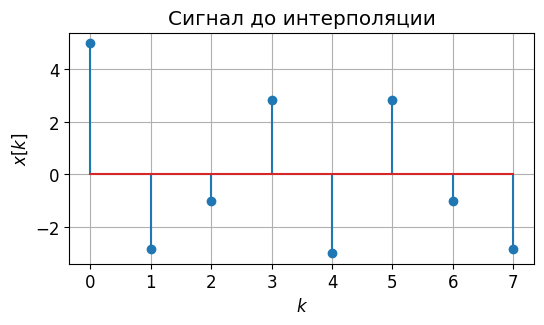

In [244]:
plt.figure(figsize=[6,3])
plt.stem(k, x)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Сигнал до интерполяции')
plt.show()

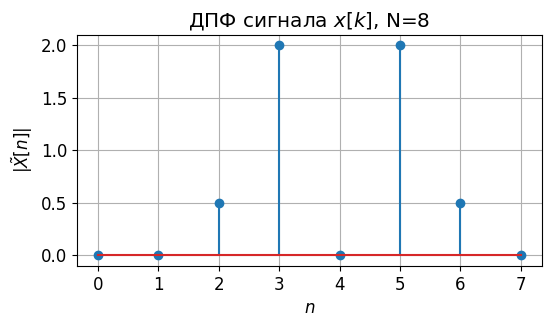

In [245]:
X = np.fft.fft(x, N)/N

plt.figure(figsize=[6,3])
plt.stem(k, np.abs(X))
plt.title(u'ДПФ сигнала $x[k]$, N=%i' %N)
plt.xlabel(u'$n$')
plt.ylabel(u'$|\\tilde{X}[n]|$')
plt.grid()

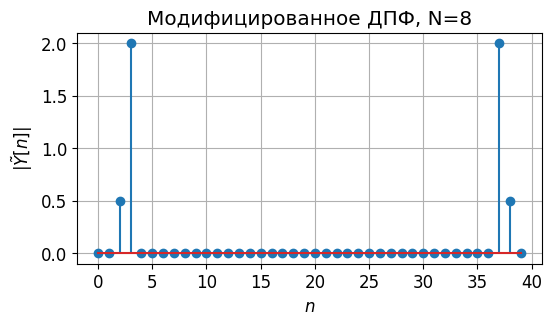

In [246]:
Y = np.hstack((X[0:(N//2)], X[N//2]/2, np.zeros((L-1)*N-1), X[N//2]/2, X[(N//2+1):N]))
M = len(Y)

plt.figure(figsize=[6,3])
plt.stem(np.arange(M), np.abs(Y))
plt.title(u'Модифицированное ДПФ, N=%i' %N)
plt.xlabel(u'$n$')
plt.ylabel(u'$|\\tilde{Y}[n]|$')
plt.grid()

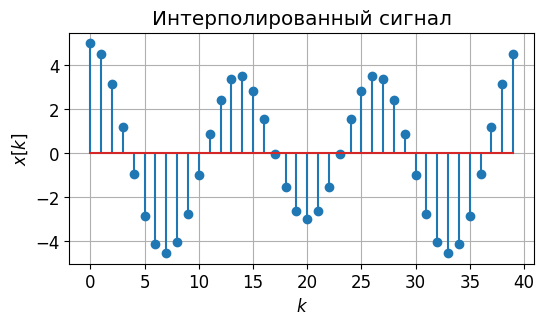

In [247]:
x = np.fft.ifft(Y)*L*N

plt.figure(figsize=[6,3])
plt.stem(np.arange(M), np.real(x))
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Интерполированный сигнал')
plt.show()

## Задача 1.2. Система однократной интерполяции.

|             |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:------------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $f_0$, кГц  |  25 |  22 |  23 |  26 |  28 |  25 |  22 |  23 |  26 |   28 |   25 |   22 |   23 |   26 |   28 |   25 |   22 |   23 |   26 |   28 |
| $f_m$, кГц  |  10 |  10 |  10 |  10 |  10 |   9 |   9 |   9 |   9 |    9 |    8 |    8 |    8 |    8 |    8 |    7 |    7 |    7 |    7 |    7 |
| Коэф. АМ, % |  80 |  70 |  80 |  70 |  80 |  70 |  80 |  70 |  80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |
| $f_д$, кГц  | 200 | 200 | 200 | 200 | 200 | 200 | 200 | 200 | 200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |
| $L$         |   3 |   4 |   5 |   3 |   4 |   5 |   4 |   3 |   4 |    5 |    3 |    4 |    5 |    3 |    4 |    5 |    4 |    3 |    4 |    5 |

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ с помощью функции ``scipy.signal.upfirdn()`` при подаче на ее вход нескольких первых отсчетов (составляющих примерно один период) амплитудно модулированного сигнала с цифрового осциллографа с параметрами из таблицы. 

1. Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции в частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы интерполяции. 



In [248]:
L = 5
fs = 200000
f0 = 23000
fm = 8000
AM = 0.8
N = 32
nu1 = 0.125
nu2 = 2 * nu1
k = np.arange(0, N)

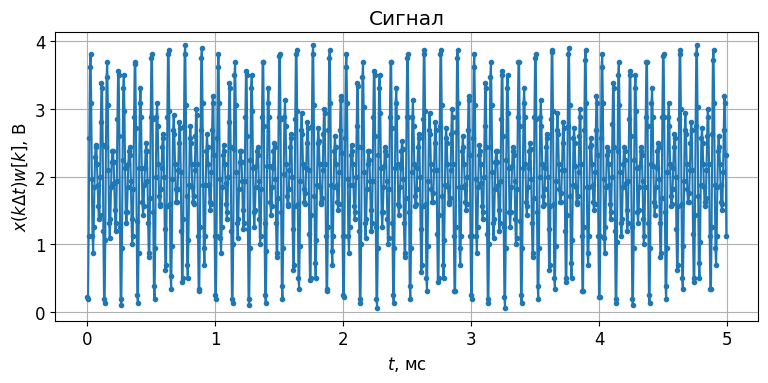

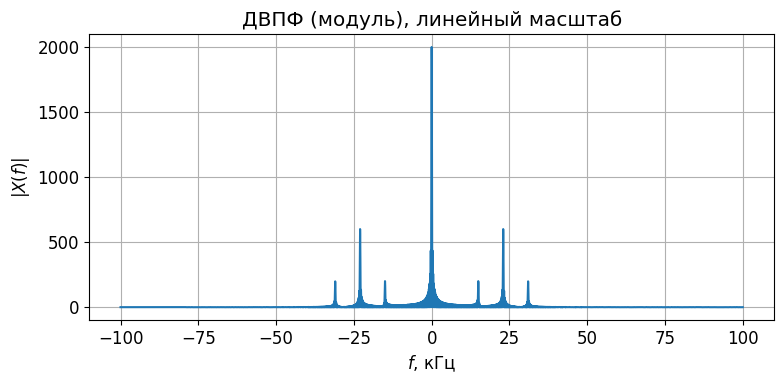

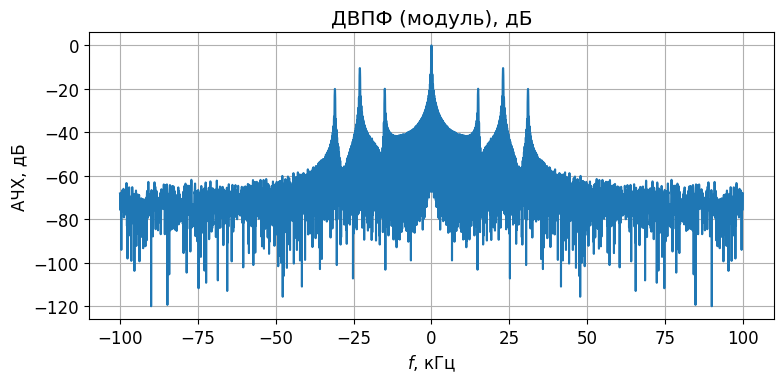

In [249]:
# Чтение сигнала из файла
fs, signal_lev = oscilloscope_file_read(file='Zaykin_1_2.txt', const_level=0)
# Анализ сигнала
analyse(fs, signal_lev, window='boxcar')

In [250]:
x = signal_lev[:N]

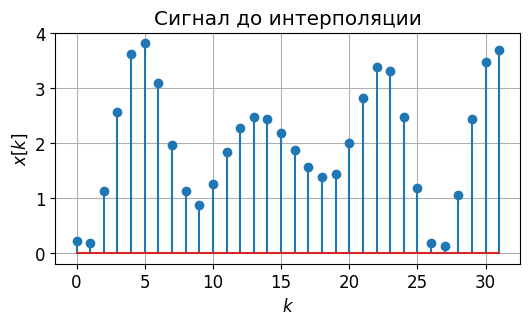

In [251]:
plt.figure(figsize=[6,3])
plt.stem(k, x)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Сигнал до интерполяции')
plt.show()

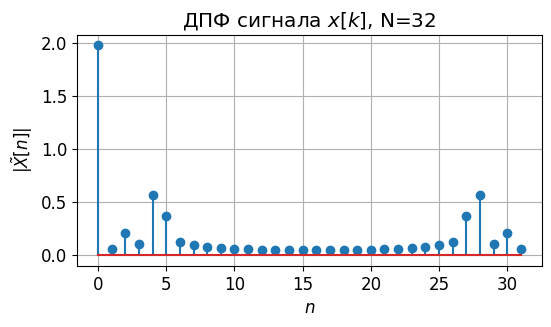

In [252]:
X = np.fft.fft(x, N)/N

plt.figure(figsize=[6,3])
plt.stem(k, np.abs(X))
plt.title(u'ДПФ сигнала $x[k]$, N=%i' %N)
plt.xlabel(u'$n$')
plt.ylabel(u'$|\\tilde{X}[n]|$')
plt.grid()

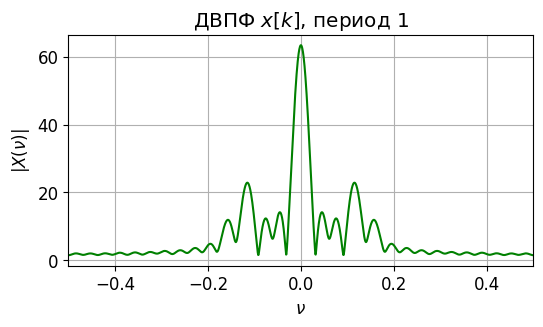

In [253]:
nu, X = dtft(x)

plt.figure(figsize=[6,3])
plt.plot(nu, abs(X), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

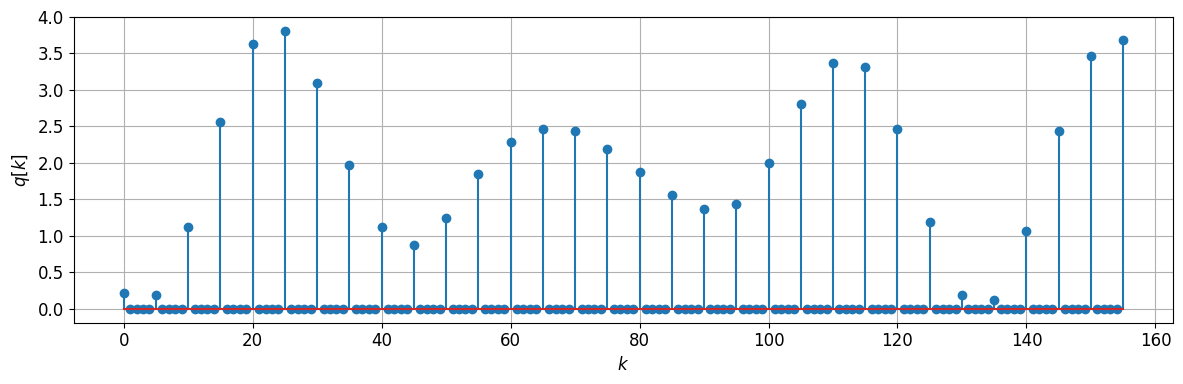

In [254]:
q=signal.upfirdn([1], x, up=L)

plt.figure(figsize=[12, 4], dpi=100)
plt.stem(np.arange(q.size), q)
plt.xlabel("$k$")
plt.ylabel('$q[k]$')
plt.tight_layout()
plt.grid()

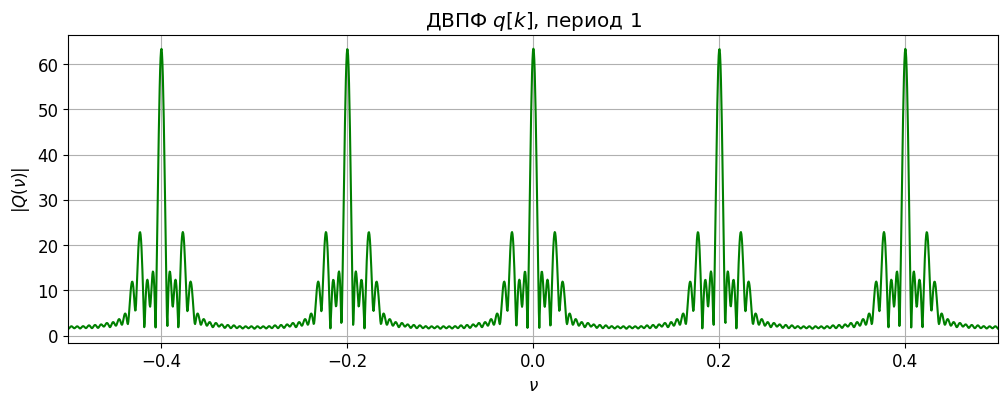

In [255]:
nu, Q = dtft(q)

plt.figure(figsize=[12,4])
plt.plot(nu, abs(Q), 'g')
plt.title(u'ДВПФ $q[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Q(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

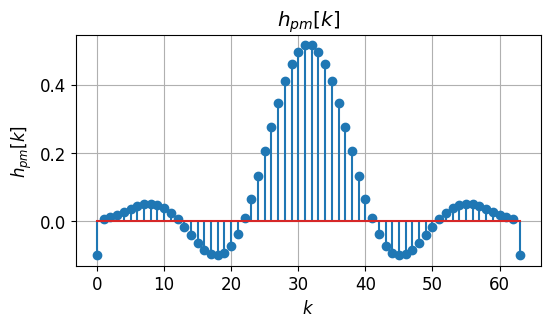

In [256]:
fs_for_remez=1
f1=1/24
f2=1/24+0.02
bands = np.array([0, f1, f2, fs_for_remez/2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps=64
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=fs_for_remez)

plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h_pm)), h_pm)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

<Figure size 960x600 with 0 Axes>

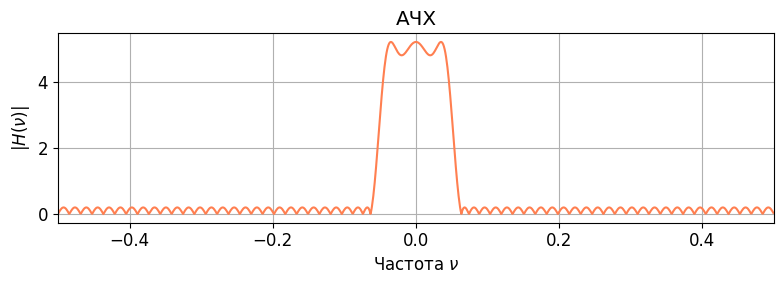

In [257]:
M=1024
plt.figure(figsize=[8, 5], dpi=120)
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M)))
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-0.5, 0.5])
plt.tight_layout()

<Figure size 1200x300 with 0 Axes>

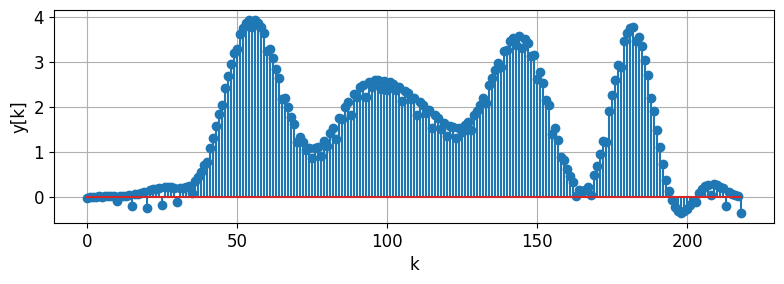

In [258]:
# FIR filter
y=signal.upfirdn(h_pm, x, up=L)
plt.figure(figsize=[12, 3], dpi=100)

plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

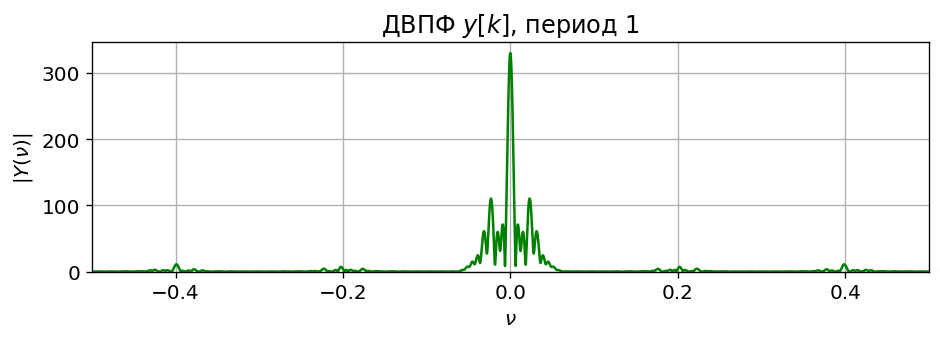

In [259]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 3], dpi=120)
plt.plot(nu, abs(Xn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])

plt.grid()
plt.tight_layout()

<Figure size 800x300 with 0 Axes>

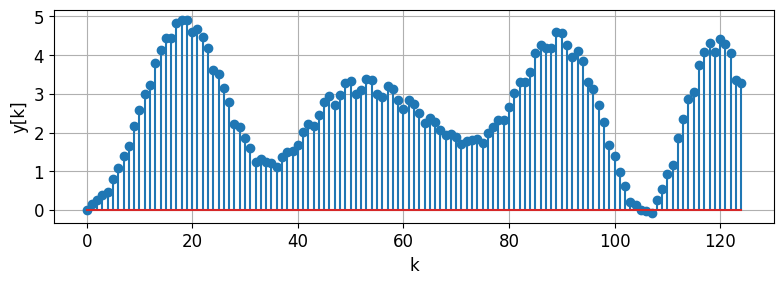

In [260]:
plt.figure(figsize=[8, 3], dpi=100)
y=signal.upfirdn(h_pm, x, up=4)   # FIR filter
y=y[numtaps//2:-(numtaps//2-1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

In [261]:
print(f'Новая частота дискретизации: {fs * L}')

Новая частота дискретизации: 1000000


## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



In [262]:
L = 2
h0 = []
h1 = []
k = np.arange(0, N)
for it in k:
  if it == 0:
    h0.append(1)
    h1.append(0.5)
  elif it == 1:
    h0.append(1)
    h1.append(1)
  elif it == 2:
    h0.append(0)
    h1.append(0.5)
  else:
    h0.append(0)
    h1.append(0)

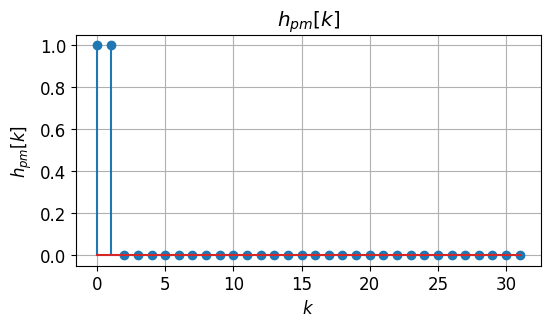

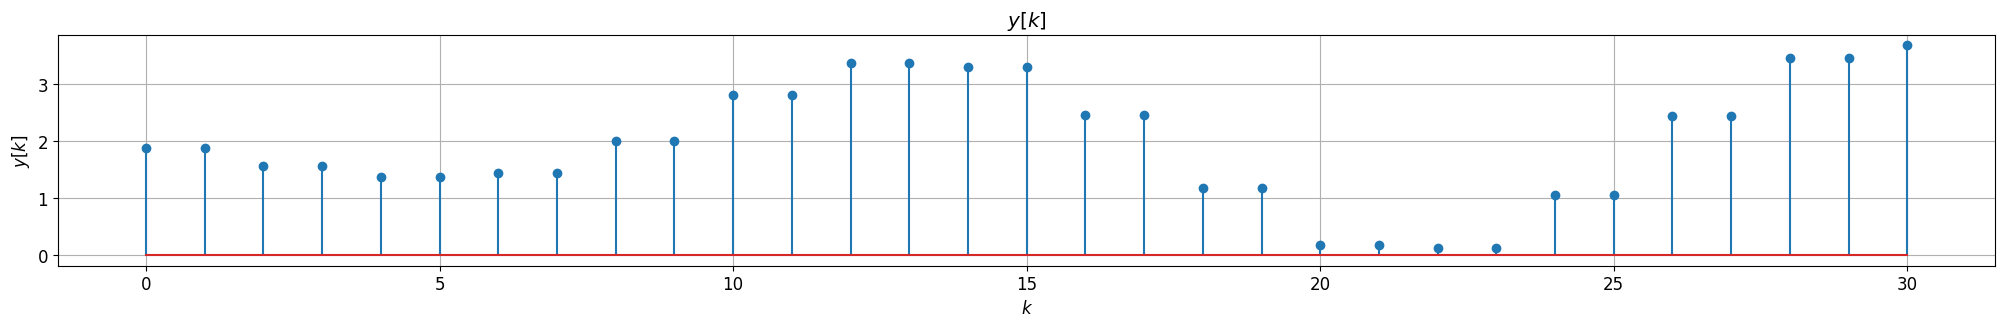

In [263]:
plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h0)), h0)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

y=signal.upfirdn(h0, x, up=L)
y=y[numtaps//2:-(numtaps//2-1)]

plt.figure(figsize=[25,3])
plt.stem(np.arange(len(y)), y)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.title('$y[k]$')
# plt.xlim(140, 160)
plt.show()

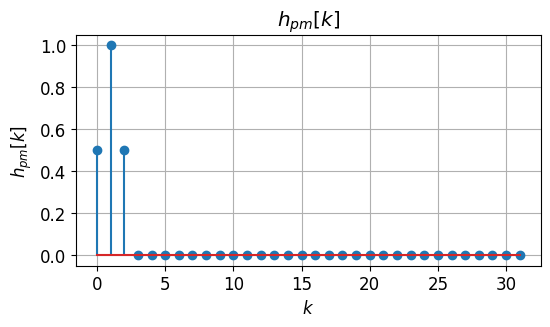

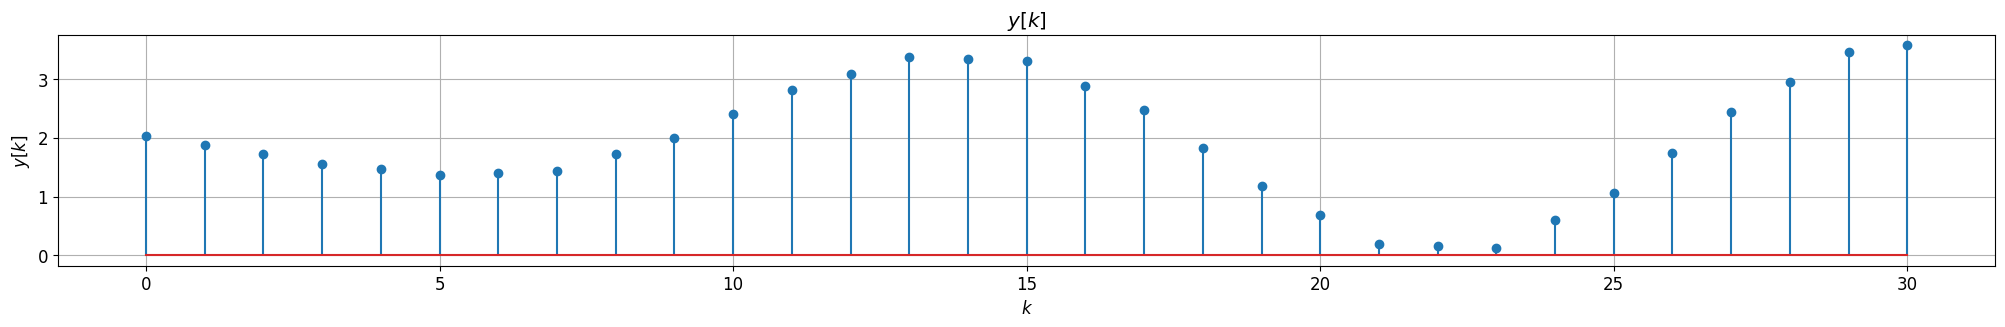

In [264]:
plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h1)), h1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

y=signal.upfirdn(h1, x, up=L)
y=y[numtaps//2:-(numtaps//2-1)]

plt.figure(figsize=[25,3])
plt.stem(np.arange(len(y)), y)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.title('$y[k]$')
# plt.xlim(140, 160)
plt.show()

#  Модуль 2. Прореживание сигналов и передискретизация с рациональным шагом.

## Задача 2.1. Система однократной децимации.

| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:-----------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $f_0$, кГц |  80 |  90 | 100 | 110 | 120 | 130 | 140 | 150 | 160 |  170 |  180 |  190 |  200 |  210 |  220 |  230 |  240 |  250 |  260 |  270 |
| $f_д$, МГц |  10 |  20 |  10 |  20 |  10 |  20 |  10 |  20 |  10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |
| $M$        |   5 |  10 |   5 |  10 |   5 |  10 |   5 |  10 |   5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход нескольких первых отсчетов синусоидального сигнала с цифрового осциллографа с параметрами из таблицы. 

1. Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы. 

In [265]:
M = 5
fs = 10000000
f0 = 200000
N = 60
k = np.arange(0, N)

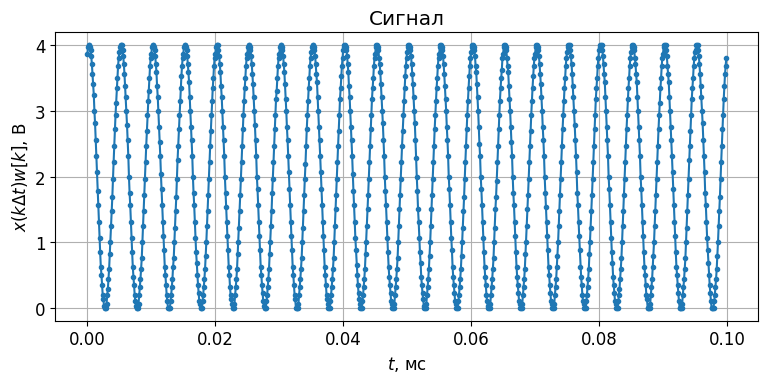

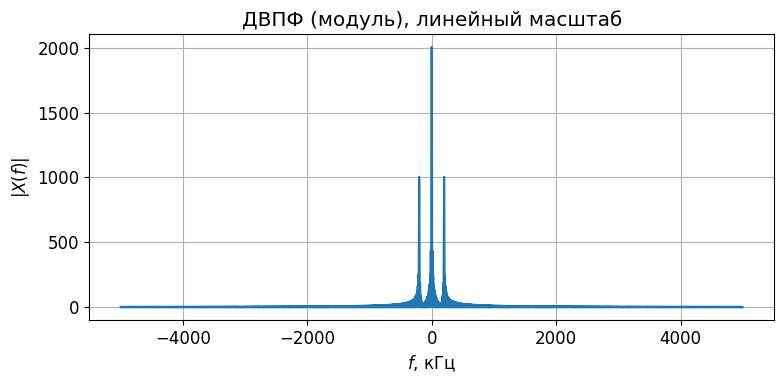

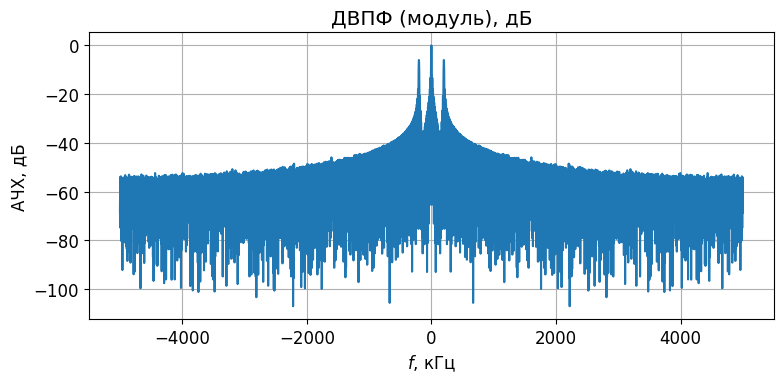

In [266]:
# Чтение сигнала из файла
fs, signal_lev = oscilloscope_file_read(file='Zaykin_2_1.txt', const_level=0)
# Анализ сигнала
analyse(fs, signal_lev, window='boxcar')

In [267]:
x = signal_lev[:N]

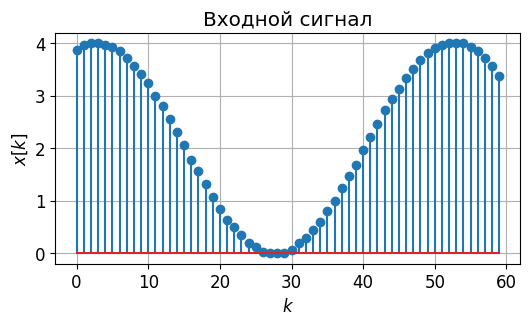

In [268]:
plt.figure(figsize=[6,3])
plt.stem(k, x)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Входной сигнал')
plt.show()

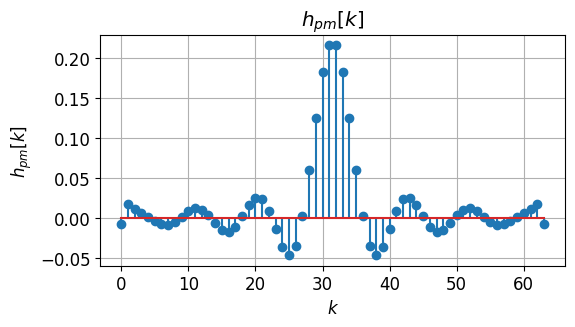

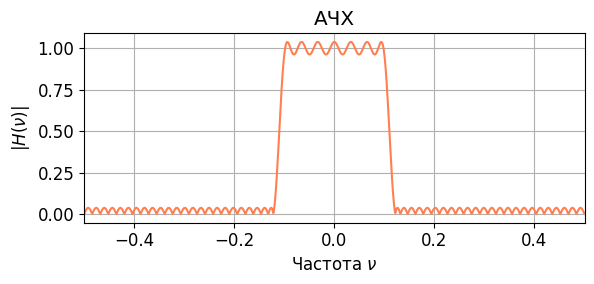

In [269]:
remez_fs=1
f1=1 / (2*M)
f2=1 / (2*M) + 0.02
bands = np.array([0, f1, f2, remez_fs/2])
desired = np.array([1, 0])
weight = np.array([1, 1])
numtaps=64
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=remez_fs)

plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h_pm)), h_pm)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

M1=1024
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M1)))

plt.figure(figsize=[6,3])
plt.plot(np.arange(M1)/M1-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-remez_fs/2, remez_fs/2])
plt.tight_layout()

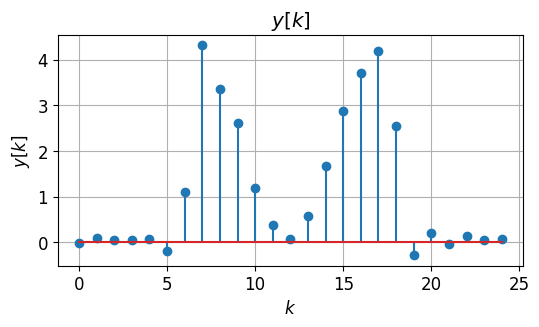

In [270]:
y=signal.upfirdn(h_pm, x, down=M)

plt.figure(figsize=[6,3])
plt.stem(np.arange(len(y)), y)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.title('$y[k]$')
plt.show()

In [271]:
len(y)

25

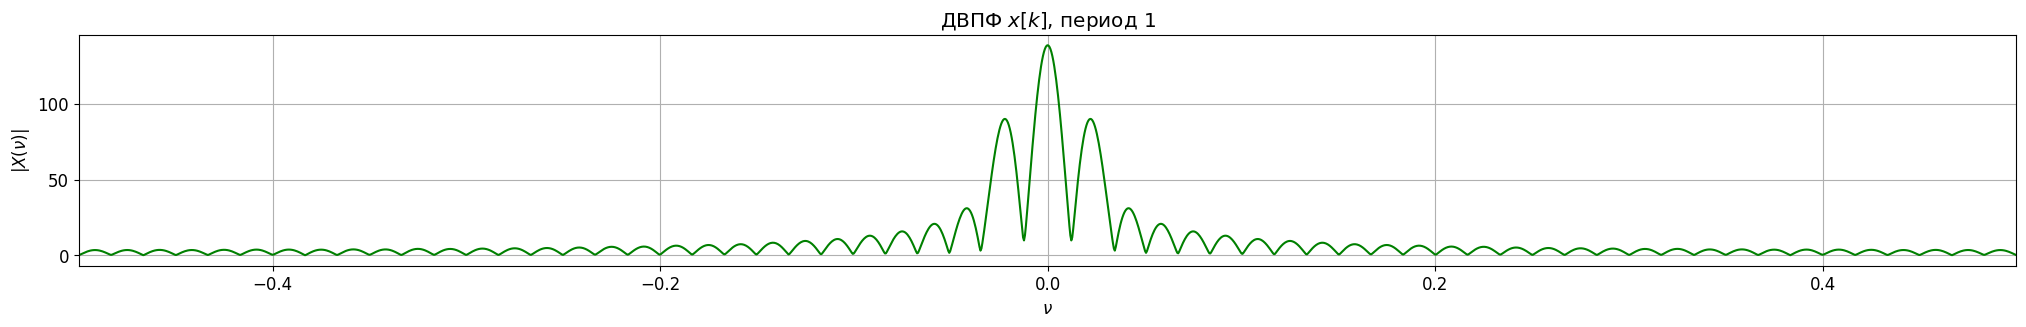

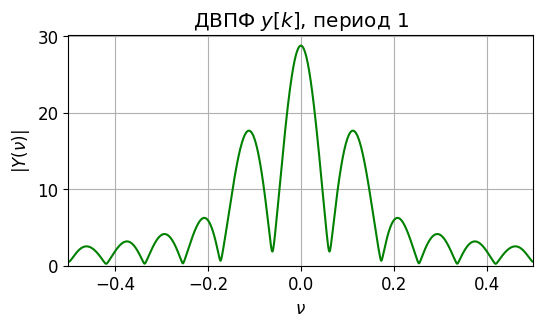

In [272]:
nu1, Xn = dtft(x)

plt.figure(figsize=[25,3])
plt.plot(nu1, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

nu, Yn = dtft(y)

plt.figure(figsize=[6,3])
plt.plot(nu, abs(Yn), 'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

In [273]:
print(f"Новая частота дискретизации = {fs / M}")

Новая частота дискретизации = 2000000.0


## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала из задачи 2.1.

1. Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы. 

In [274]:
L = 5
M = 2
N = 64
k = np.arange(0, N)
x = signal_lev[:N]

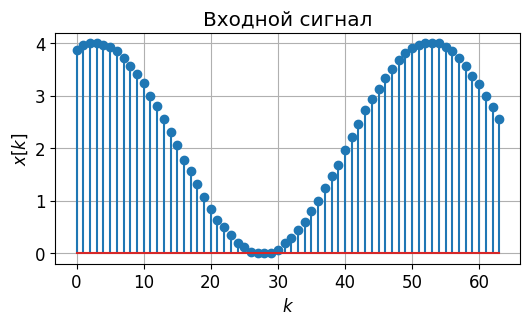

In [275]:
plt.figure(figsize=[6,3])
plt.stem(k, x)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Входной сигнал')
plt.show()

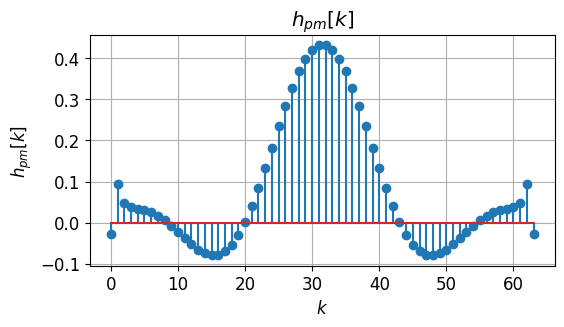

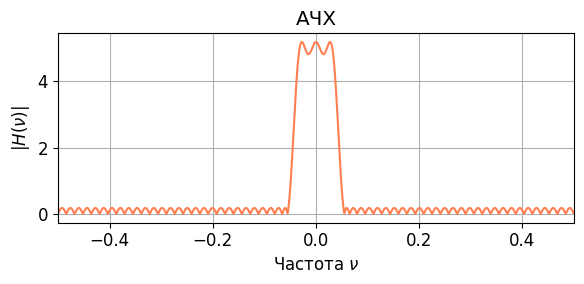

In [276]:
remez_fs=1
f1=1 / (6 * max(L, M))
f2=1 / (6 * max(L, M)) + 0.02
bands = np.array([0, f1, f2, remez_fs/2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps=64
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=remez_fs)

plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h_pm)), h_pm)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

M1=1024
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M1)))

plt.figure(figsize=[6,3])
plt.plot(np.arange(M1)/M1-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-remez_fs/2, remez_fs/2])
plt.tight_layout()

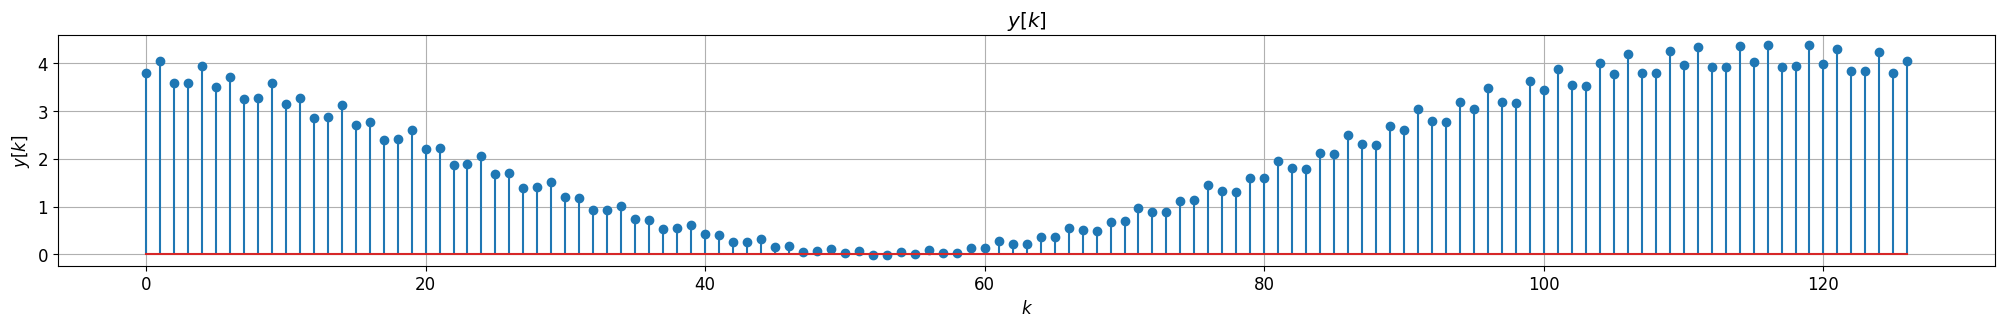

In [277]:
y=signal.upfirdn(h_pm, x, up=L, down=M)
y=y[numtaps//2:-(numtaps//2-1)]

plt.figure(figsize=[25,3])
plt.stem(np.arange(len(y)), y)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.title('$y[k]$')
# plt.xlim(140, 160)
plt.show()

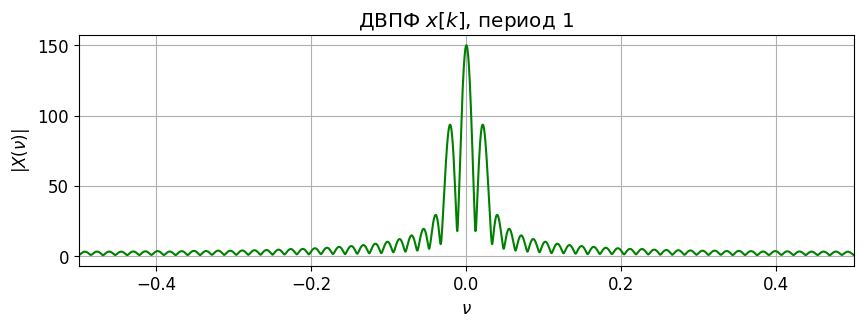

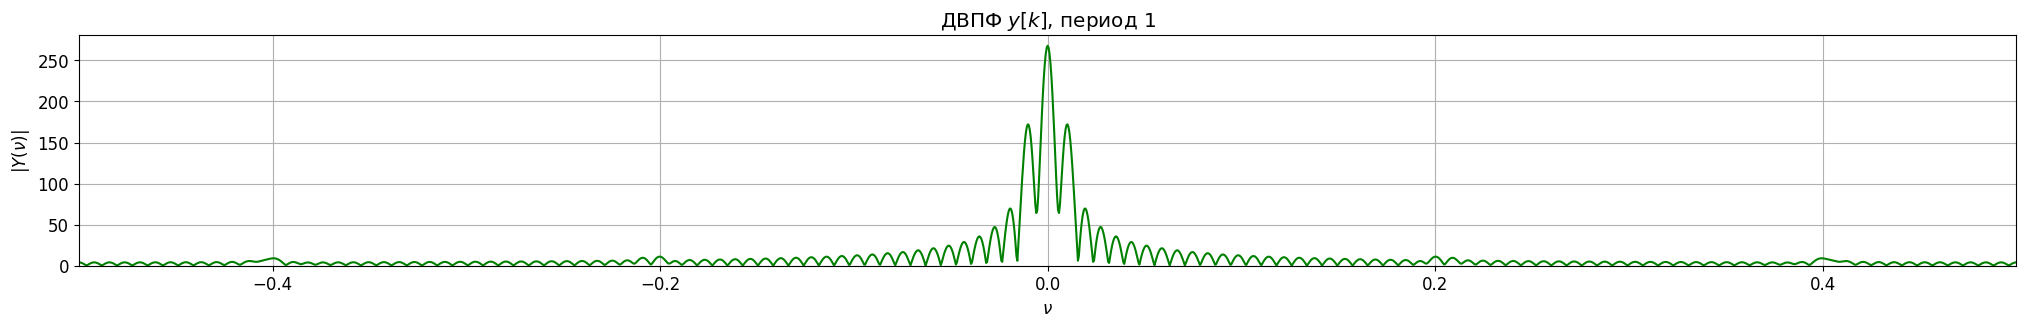

In [278]:
nu1, Xn = dtft(x)

plt.figure(figsize=[10,3])
plt.plot(nu1, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

nu, Yn = dtft(y)

plt.figure(figsize=[25,3])
plt.plot(nu, abs(Yn), 'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

In [279]:
print(f"Новая частота дискретизации = {fs * L / M}")

Новая частота дискретизации = 25000000.0


#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала из задачи 2.1 с помощью функции ``scipy.signal.resample_poly()``.


1. Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2. Изобразите схему данной полифазной структуры однократной интерполяции. 

3. Укажите шаг и частоту дискретизации выходного сигнала системы. 


In [280]:
L = 4
N = 32
k = np.arange(0, N)
x = signal_lev[:N]

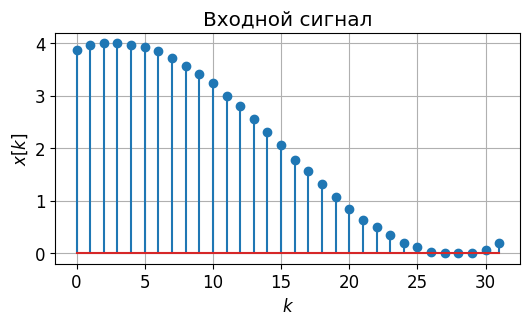

In [281]:
plt.figure(figsize=[6,3])
plt.stem(k, x)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('Входной сигнал')
plt.show()

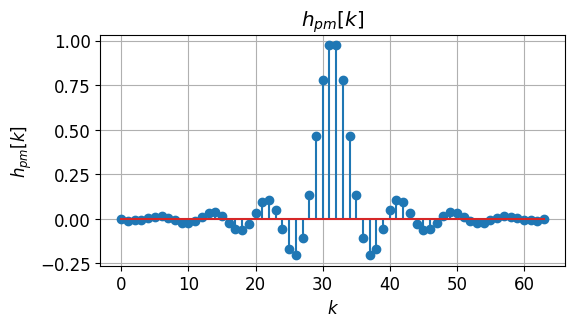

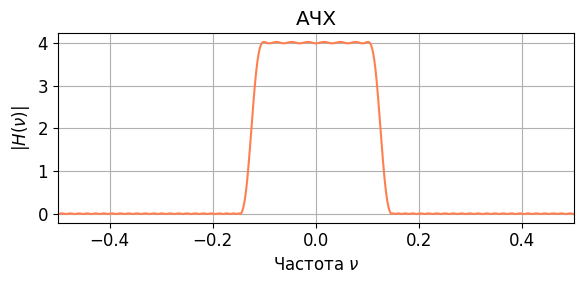

In [282]:
remez_fs=1
f1=1 / (2*L) - 0.02
f2=1 / (2*L) + 0.02
bands = np.array([0, f1, f2, remez_fs/2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps=64
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=remez_fs)

plt.figure(figsize=[6,3])
plt.stem(np.arange(len(h_pm)), h_pm)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$h_{pm}[k]$')
plt.title('$h_{pm}[k]$')
plt.show()

M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M)))

plt.figure(figsize=[6,3])
plt.plot(np.arange(M)/M-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-remez_fs/2, remez_fs/2])
plt.tight_layout()

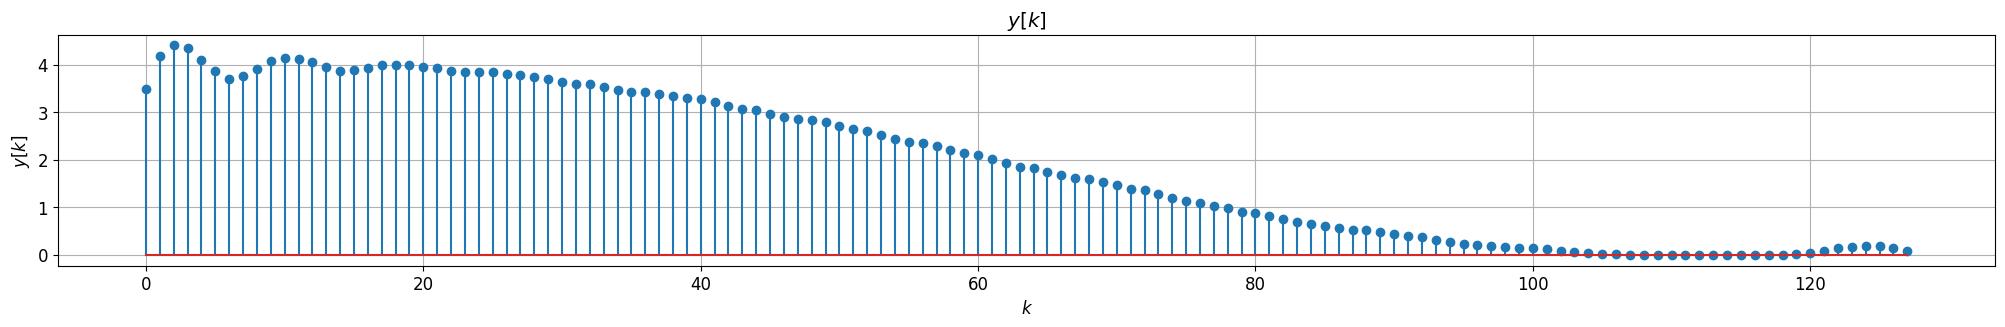

In [283]:
y = signal.resample_poly(x, up=L, down=1, window=h_pm/L)

plt.figure(figsize=[25,3])
plt.stem(np.arange(len(y)), y)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.title('$y[k]$')
plt.show()

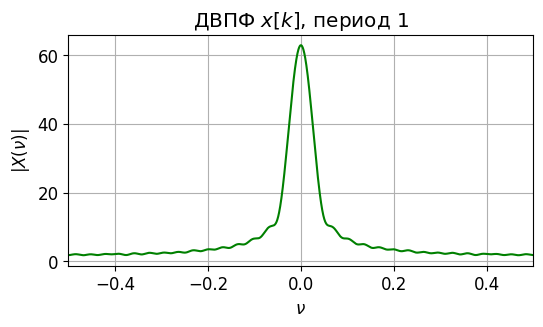

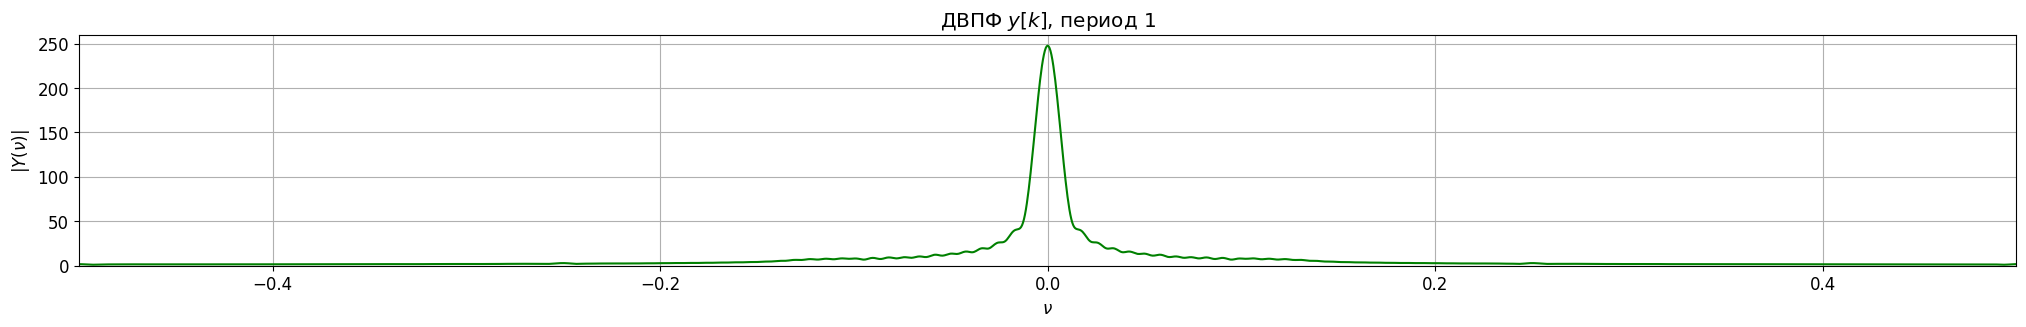

In [284]:
nu1, Xn = dtft(x)

plt.figure(figsize=[6,3])
plt.plot(nu1, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

nu, Yn = dtft(y)

plt.figure(figsize=[25,3])
plt.plot(nu, abs(Yn), 'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()

In [285]:
print(f'Частота дискретизации {fs * L}')

Частота дискретизации 40000000


## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.


| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:----|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $N$ |  16 |  16 |  16 |  16 |  16 |  12 |  12 |  12 |  12 |   12 |   20 |   20 |   20 |   20 |   20 |   32 |   32 |   32 |   32 |   32 |
| $Q$ |   3 |   4 |   5 |   6 |   7 |   3 |   4 |   5 |   6 |    7 |    3 |    4 |    5 |    6 |    7 |    3 |    4 |    5 |    6 |    7 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). Постройте блок-схему одной из возможных реализаций даннного цифрового фильтра. 





In [286]:
N = 20
Q = 5

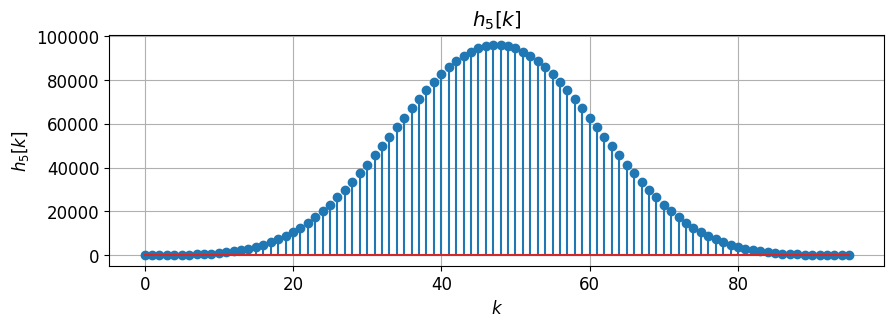

In [287]:
h1 = np.ones(N)
hq = h1
for q in range(1, Q):
  hq = np.convolve(hq, h1)

plt.figure(figsize=[10,3])
plt.stem(np.arange(len(hq)), hq)
plt.grid()
plt.xlabel('$k$')
plt.ylabel(f'$h_{{{Q}}}[k]$')
plt.title(f'$h_{{{Q}}}[k]$')
plt.show()

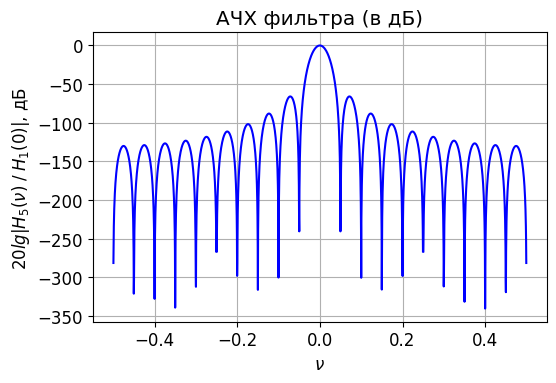

In [288]:
HQ=np.fft.fftshift(np.fft.fft(hq, 2048))
nu=np.arange(HQ.size)/HQ.size-0.5

plt.figure(figsize=[16, 4])

plt.subplot(1, 3, 2)
with np.errstate(divide='ignore'):
    plt.plot(nu, 20*np.log10(abs(HQ)/max((abs(HQ)))), 'b')
plt.xlabel("$\\nu$")
plt.ylabel(f"$20 lg|H_{Q}(\\nu)\;/\;H_1(0)|$, дБ")
plt.title("АЧХ фильтра (в дБ)")
plt.grid()
plt.tight_layout()